In [2]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi
from windrose import WindroseAxes
import plotly.express as px



In [3]:
#df = pd.read_csv("true_wind_speed.txt")
#df2 = pd.read_csv("true_wind_dir.txt", usecols=['direction'])
#colnames = ["speed", "direction"]
#df = pd.read_csv('avg_apparent_wind_speed2-kopi.txt', names=colnames, index_col=0)

df = pd.read_csv("saveTWD_AalesFloro-per_time.csv")

df2 = pd.read_csv("saveTWS_AalesFloro-per_time.csv", usecols=['TWS'])
#df2 = pd.read_csv("avg_apparent_wind_speed2-kopi.txt", usecols=['direction'])
df = df.join(df2['TWS'], how='right')
df[df<0]+=360
df.head()

,number,TWD,TWS
0,0,313.019955,6.210072
1,1,316.655321,6.881860
2,2,311.410359,6.881860
3,3,317.170351,6.881860
4,4,310.857033,6.627586


<AxesSubplot: xlabel='velocity_x', ylabel='velocity_y'>

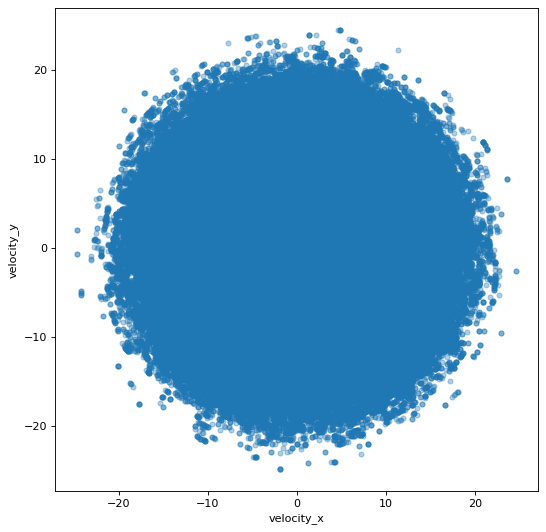

In [4]:
df['velocity_x'] = df['TWS'] * np.sin(df['TWD'])
df['velocity_y'] = df['TWS'] * np.cos(df['TWD'])
fig, ax = plt.subplots(figsize=(8,8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
df.plot(kind='scatter', x='velocity_x', y='velocity_y', alpha=0.35, ax=ax)

<AxesSubplot: >

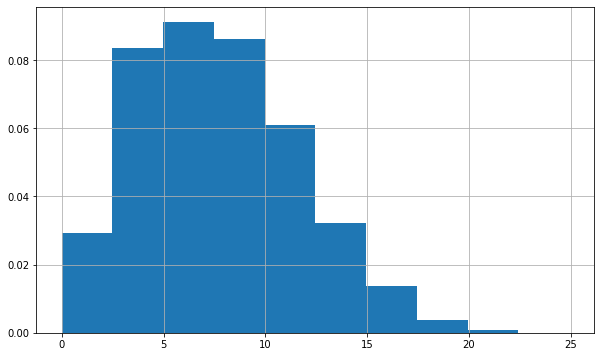

In [5]:
df['TWS'].hist(figsize=(10,6), density=True)

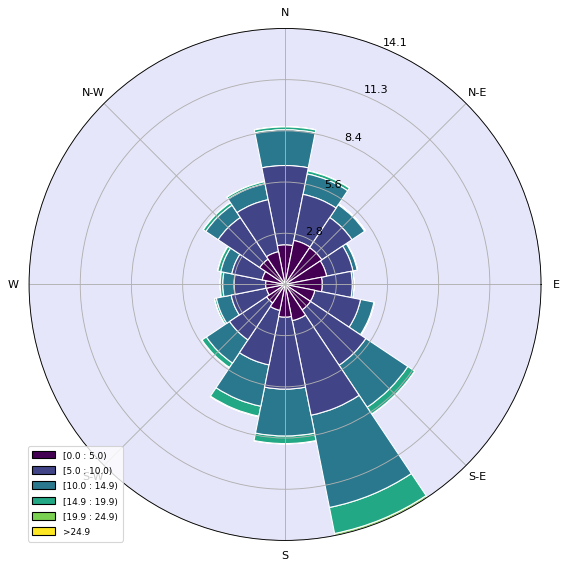

In [6]:
ax = WindroseAxes.from_ax()
ax.bar(df.TWD, df.TWS, normed=True,opening=1, edgecolor='white')
#ax.set_yticks(np.arange(10, 60, step=10))
#ax.set_yticklabels(np.arange(10, 60, step=10))
#ax.set_xticklabels((90, 45, 0, 315, 270, 225, 180, 135))
ax.patch.set_facecolor('lavender')
ax.set_legend()

#df = px.data.wind()
#ig = px.bar_polar(df, r="frequency", theta="direction",
                   #color="strength", template="plotly_dark",
                   #color_discrete_sequence= px.colors.sequential.Plasma_r)
#fig.show()

In [7]:
grp = df.groupby(["TWD", "TWS"]).size().reset_index(name="frequency")
grp = px.data.wind()
fig = px.bar_polar(grp, r="frequency", theta="direction",
    color="strength", template="plotly",
color_discrete_sequence=px.colors.sequential.Turbo
)
fig.update_layout(paper_bgcolor = '#ffffff')
fig.show()

In [6]:
grp = df.groupby(["TWD", "TWS"]).size().reset_index(name="frequency")
grp = px.data.wind()
fig = px.bar_polar(grp, r="frequency", theta="direction",
    color="strength", template="plotly_dark"
)
fig.show()